In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('./car_insurance_data.csv')
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [90]:
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [9]:
df.shape

(58592, 44)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [11]:
df.drop(columns=['policy_id'], inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [12]:
for col in df.select_dtypes('object').columns:
  print(f'{col} has unique values: ', df[col].unique(), '\n')

area_cluster has unique values:  ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22'] 

segment has unique values:  ['A' 'C1' 'C2' 'B2' 'B1' 'Utility'] 

model has unique values:  ['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11'] 

fuel_type has unique values:  ['CNG' 'Petrol' 'Diesel'] 

max_torque has unique values:  ['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '200Nm@1750rpm' '85Nm@3000rpm'
 '170Nm@4000rpm'] 

max_power has unique values:  ['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '97.89bhp@3600rpm' '61.68bhp@6000rpm' '118.36bhp@5500rpm'] 

engine_type has unique values:  ['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron'] 

is_esc has u

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [14]:
df.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

# Feature Engineering

In [15]:
df['max_torque'].unique()

array(['60Nm@3500rpm', '113Nm@4400rpm', '91Nm@4250rpm', '250Nm@2750rpm',
       '200Nm@3000rpm', '82.1Nm@3400rpm', '200Nm@1750rpm', '85Nm@3000rpm',
       '170Nm@4000rpm'], dtype=object)

In [16]:
import re

def calc_torque(text):
  Nm, rpm = re.findall(r'\d+.?\d+', text)
  return np.multiply(float(Nm), float(rpm))

def calc_power(text):
  bhp, rpm = re.findall(r'\d+.?\d+', text)
  return np.multiply(float(bhp), float(rpm))

In [17]:
df['max_torque'] = df['max_torque'].apply(calc_torque)
df['max_torque'].head()

0    210000.0
1    210000.0
2    210000.0
3    497200.0
4    386750.0
Name: max_torque, dtype: float64

In [18]:
df['max_power'] = df['max_power'].apply(calc_power)
df['max_power'].head()

0    242160.0
1    242160.0
2    242160.0
3    531000.0
4    368830.0
Name: max_power, dtype: float64

# Univariate Analysis

In [19]:
def plot_dist(col):
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


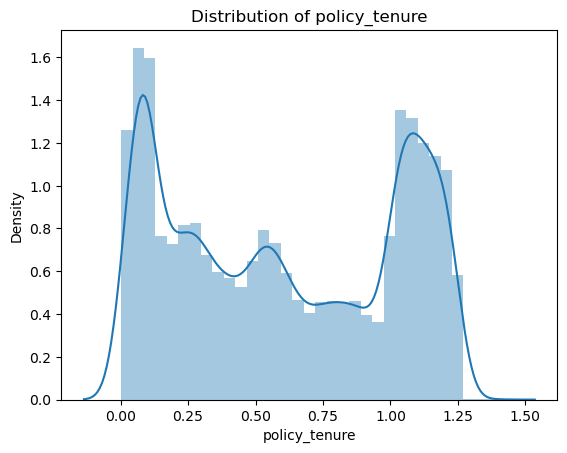

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


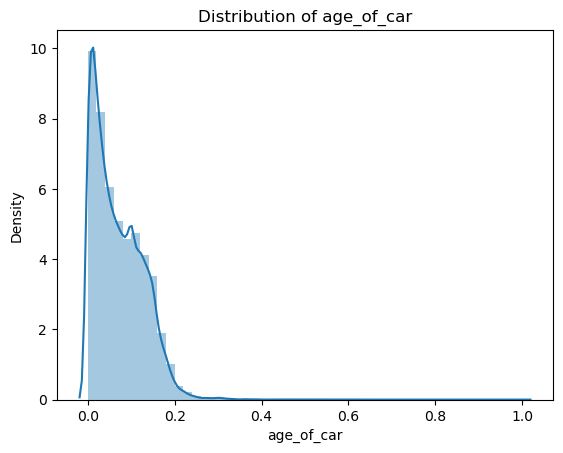

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


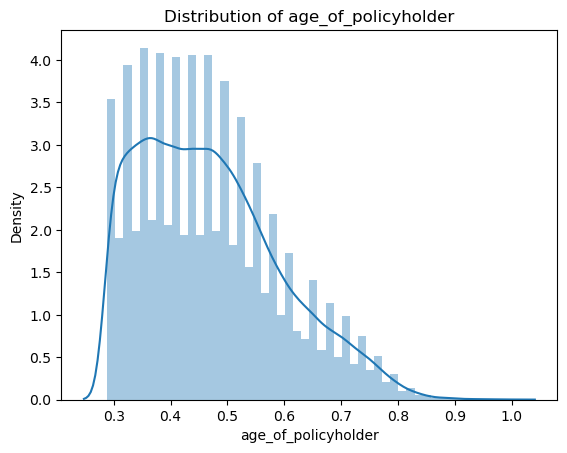

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


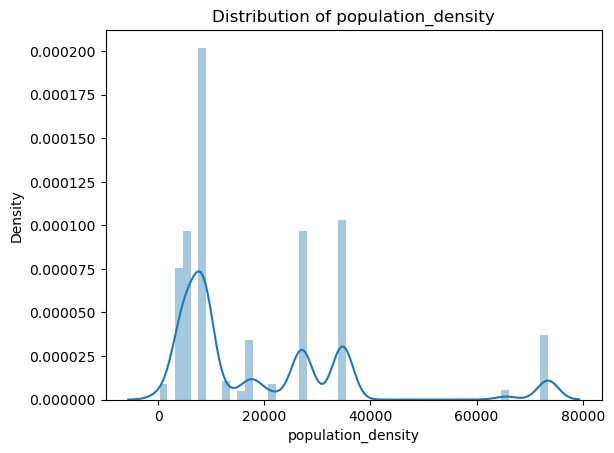

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


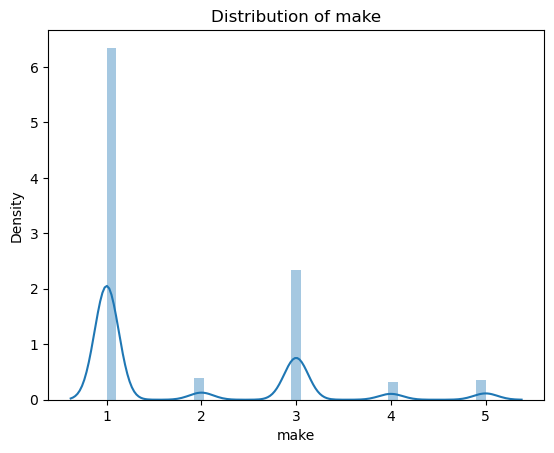

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


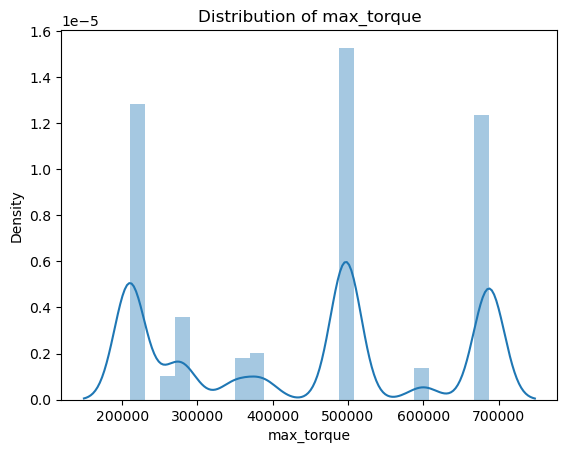

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


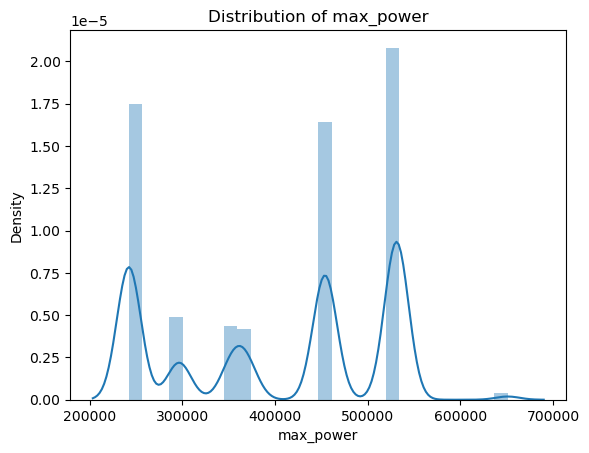

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


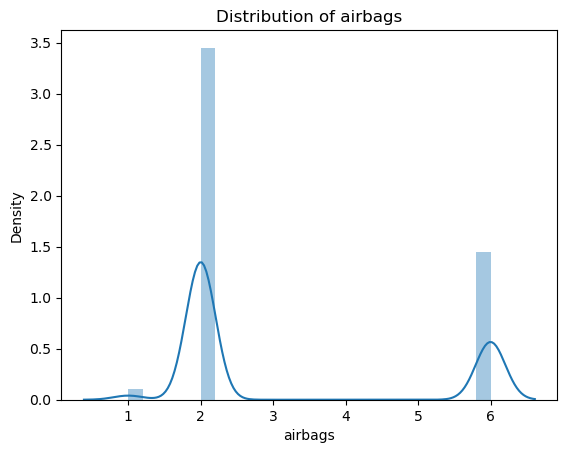

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


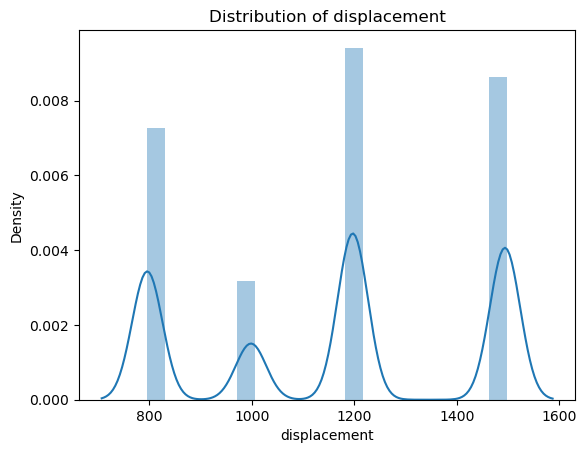

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


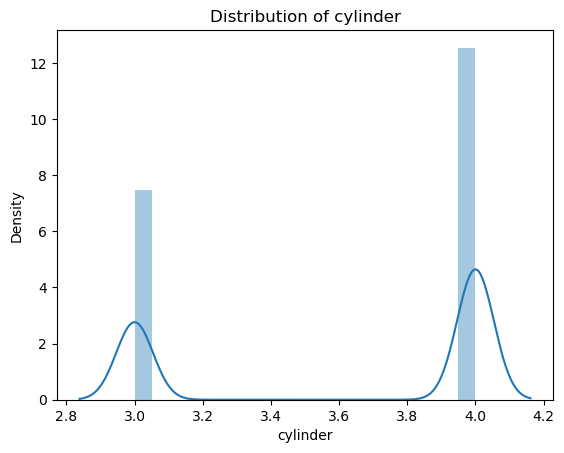

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


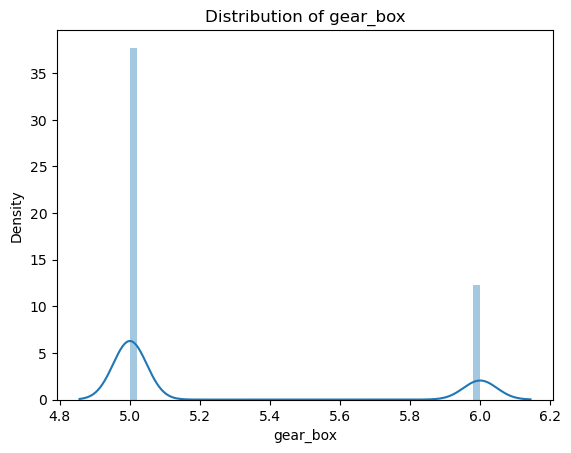

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


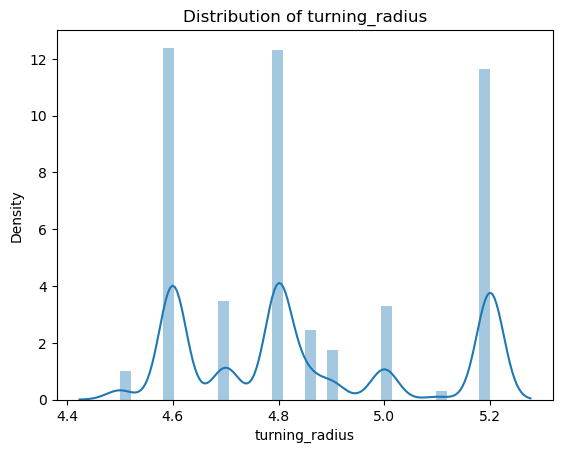

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


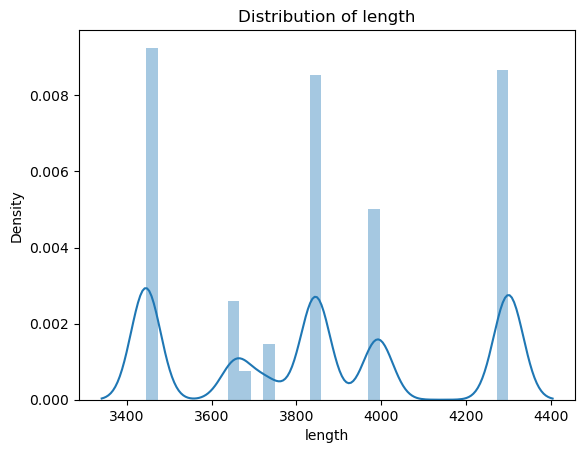

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


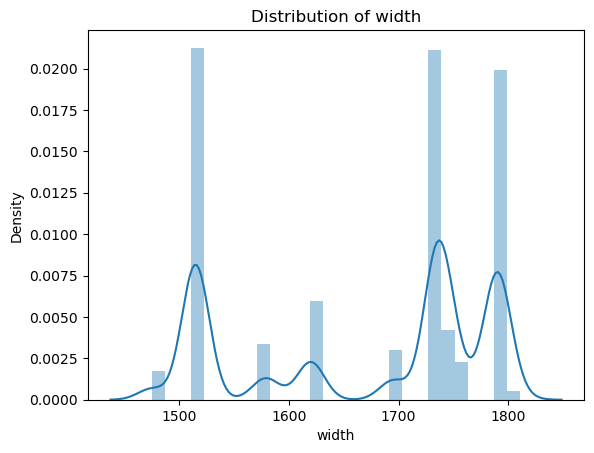

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


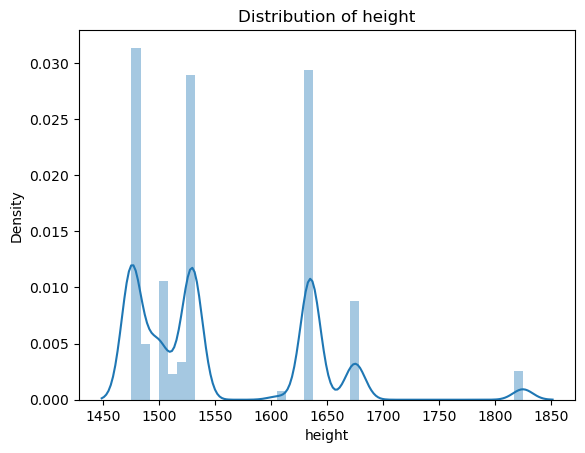

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


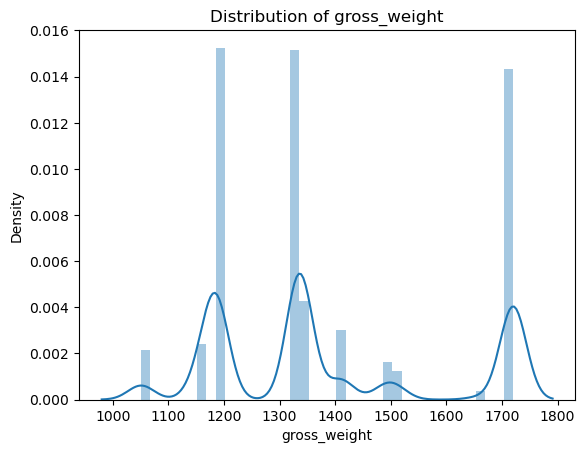

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


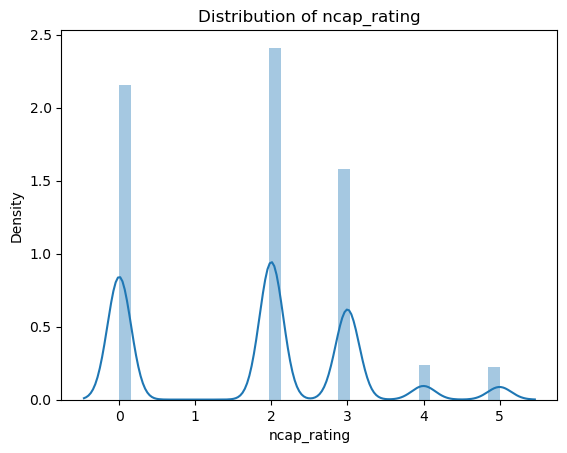

C:\Users\Chima Orji\AppData\Local\Temp\ipykernel_27724\2121869511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


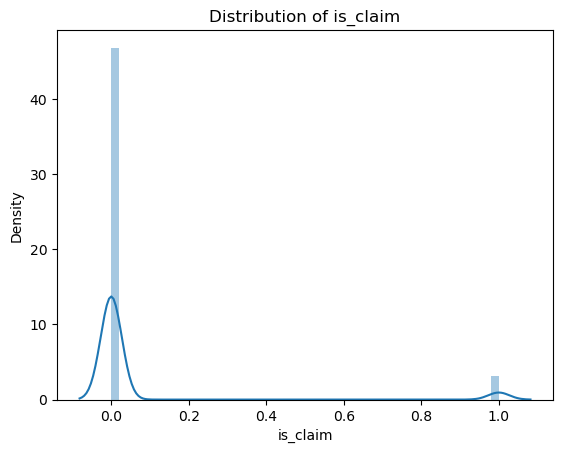

In [20]:
# [*map(do_distplot, df.select_dtypes(include=['int64', 'float64']).columns)]

for col in df.select_dtypes(include=['int64', 'float64']).columns:
  plot_dist(col)

In [21]:
df['max_torque']

0        210000.0
1        210000.0
2        210000.0
3        497200.0
4        386750.0
           ...   
58587    386750.0
58588    210000.0
58589    210000.0
58590    497200.0
58591    687500.0
Name: max_torque, Length: 58592, dtype: float64

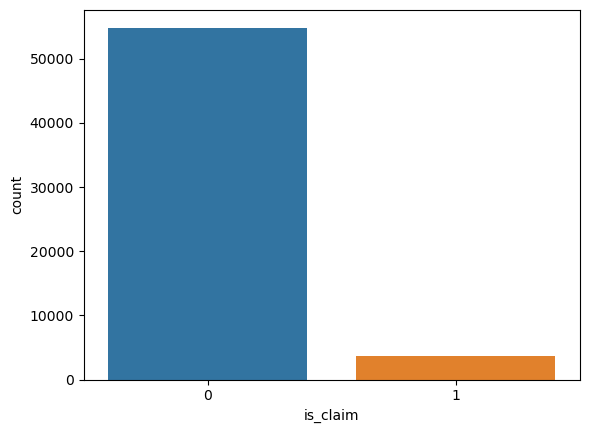

In [22]:
sns.countplot(x='is_claim', data=df);

# Bivariate Analysis

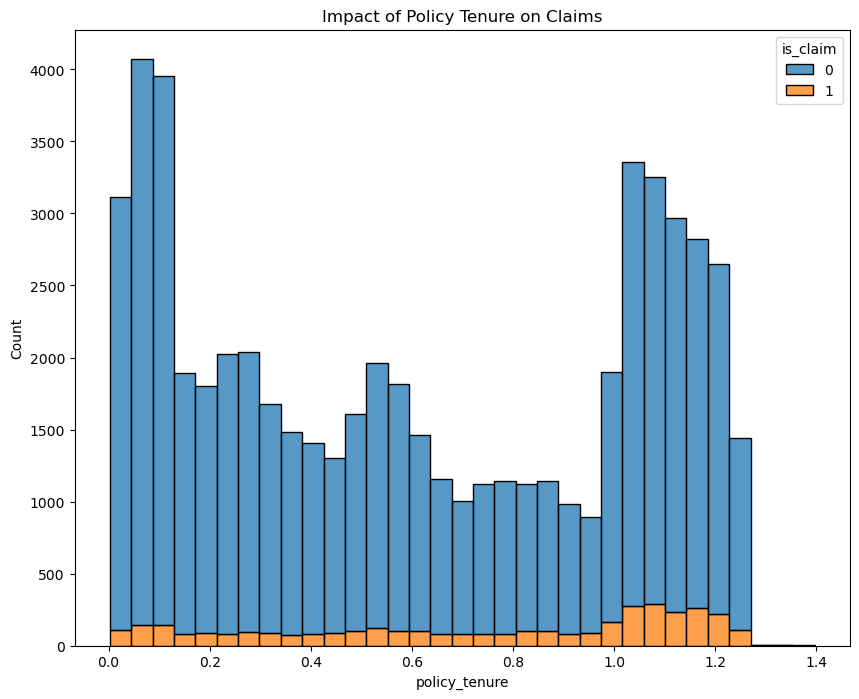

In [23]:
# Policy Tenure vs Claims
plt.figure(figsize=(10, 8))
sns.histplot(x='policy_tenure', hue='is_claim', data=df, multiple='stack')
plt.title('Impact of Policy Tenure on Claims');

Longer policy tenures tend to drive high claims

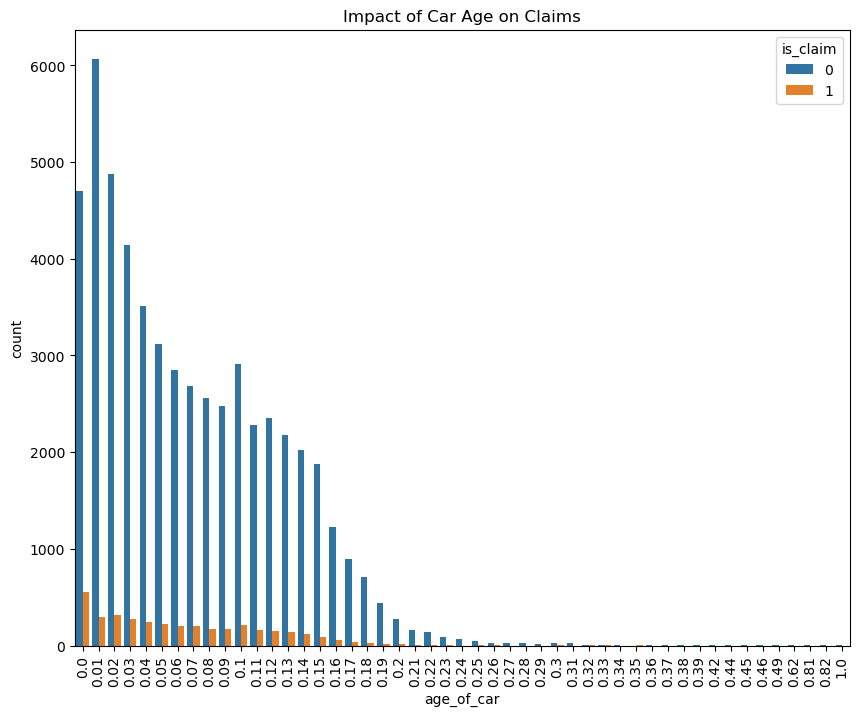

In [24]:
plt.figure(figsize=(10, 8))
sns.countplot(x='age_of_car', hue='is_claim', data=df)
plt.title('Impact of Car Age on Claims');
plt.xticks(rotation=90);

In [25]:
# New cars tend to have higher claims

<Axes: xlabel='area_cluster'>

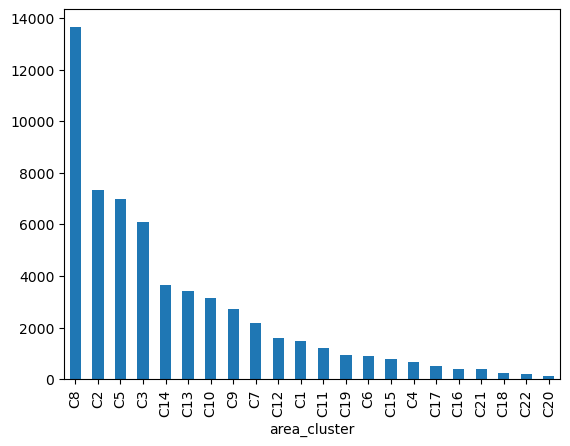

In [26]:
# df.sort_values(by='area_cluster', ascending=False)
df['area_cluster'].value_counts().plot(kind='bar')

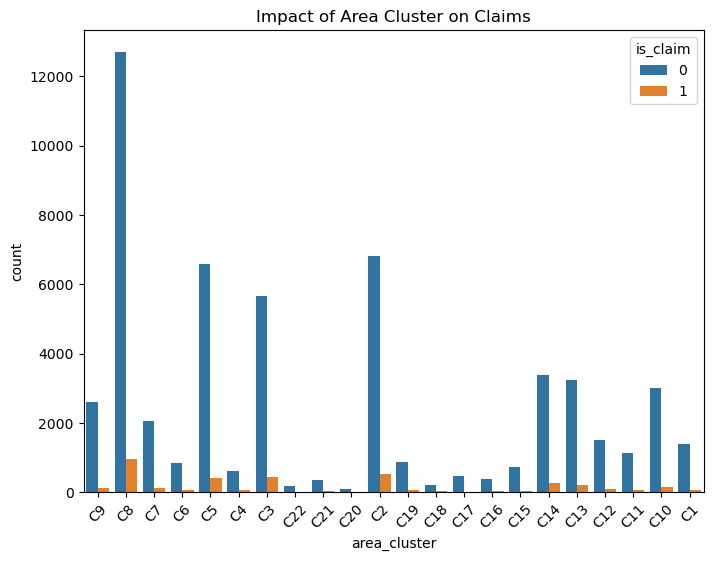

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='area_cluster', hue='is_claim', data=df.sort_values(by='area_cluster',
                                                                    ascending=False))
plt.title('Impact of Area Cluster on Claims');
plt.xticks(rotation=45);

In [28]:
# Cars in the C8 cluster area tend to be most claimed

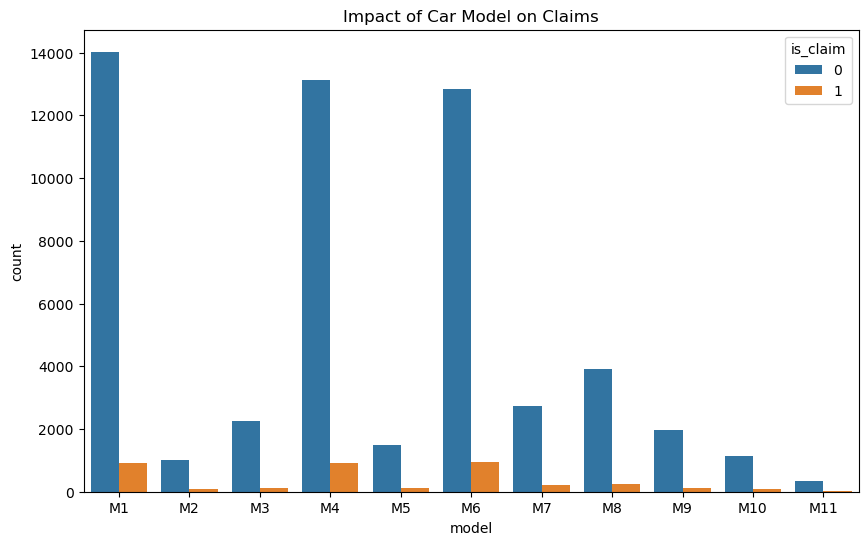

In [180]:
plt.figure(figsize=(10, 6))
sns.countplot(x='model', hue='is_claim', data=df)
plt.title('Impact of Car Model on Claims');
# plt.xticks(rotation=45);

In [30]:
# Car models M1, M4, M6 tend to have higher claims

<Axes: xlabel='is_claim', ylabel='max_torque'>

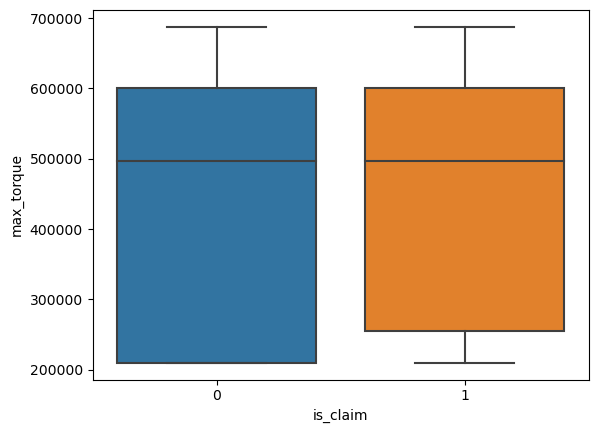

In [31]:
sns.boxplot(x='is_claim', y='max_torque', data=df)

<Axes: xlabel='is_claim', ylabel='max_power'>

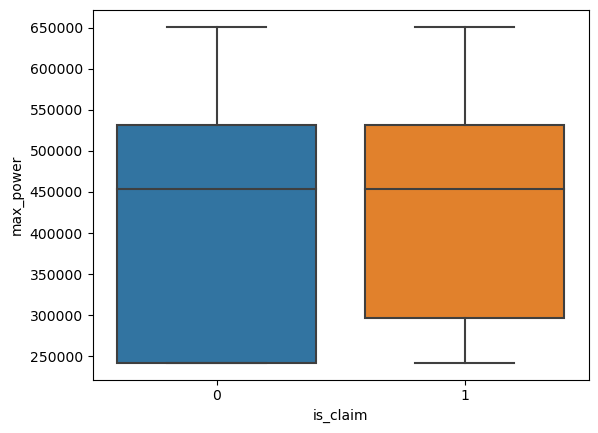

In [32]:
sns.boxplot(x='is_claim', y='max_power', data=df)

In [33]:
# No influence of car max_torque and max_power on claim frequency

<Axes: xlabel='max_torque', ylabel='max_power'>

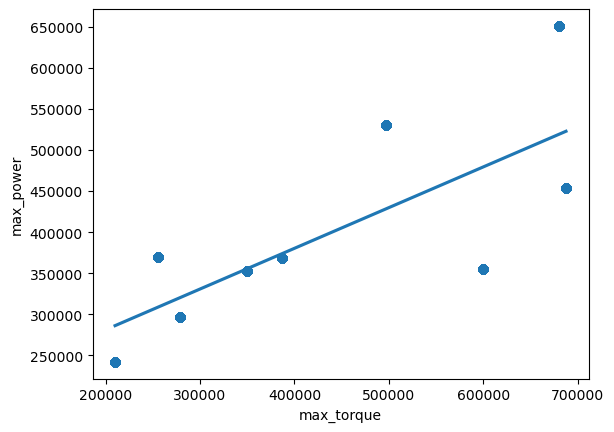

In [34]:
sns.regplot(x='max_torque', y='max_power', data=df)

Text(0.5, 1.0, 'Impact of Car Height on Claims')

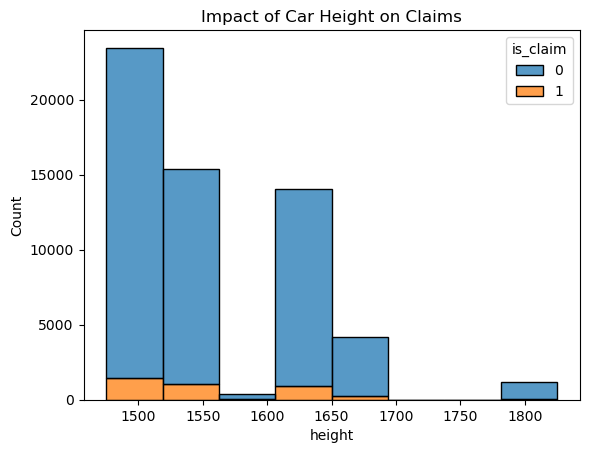

In [91]:
sns.histplot(x='height', hue='is_claim', data=df, multiple='stack', bins=8);
plt.title('Impact of Car Height on Claims')

In [36]:
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

(0.0, 10000.0)

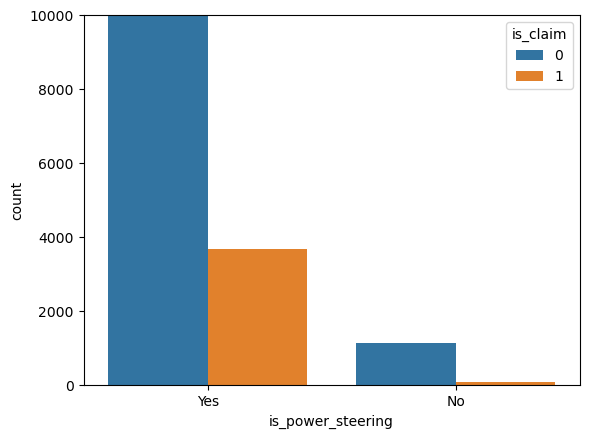

In [37]:
sns.countplot(x='is_power_steering', hue='is_claim', data=df)
plt.ylim(0, 10_000)

In [38]:
# Cars having power steering tend to have more claims

(0.0, 10000.0)

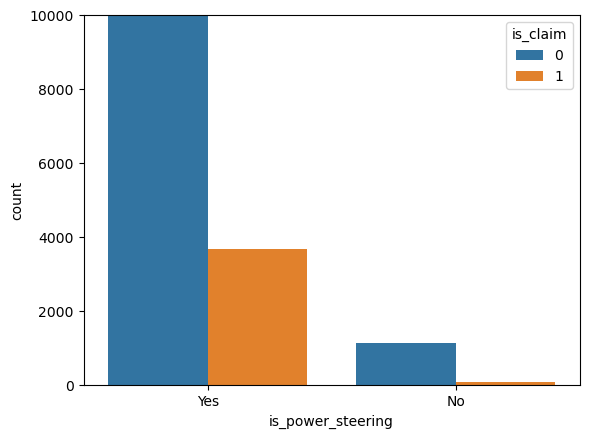

In [39]:
sns.countplot(x='is_power_steering', hue='is_claim', data=df)
plt.ylim(0, 10_000)

<Axes: xlabel='is_rear_window_wiper', ylabel='count'>

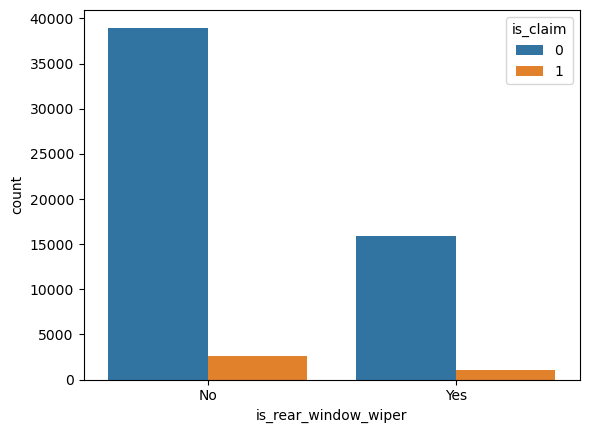

In [40]:
sns.countplot(x='is_rear_window_wiper', hue='is_claim', data=df)

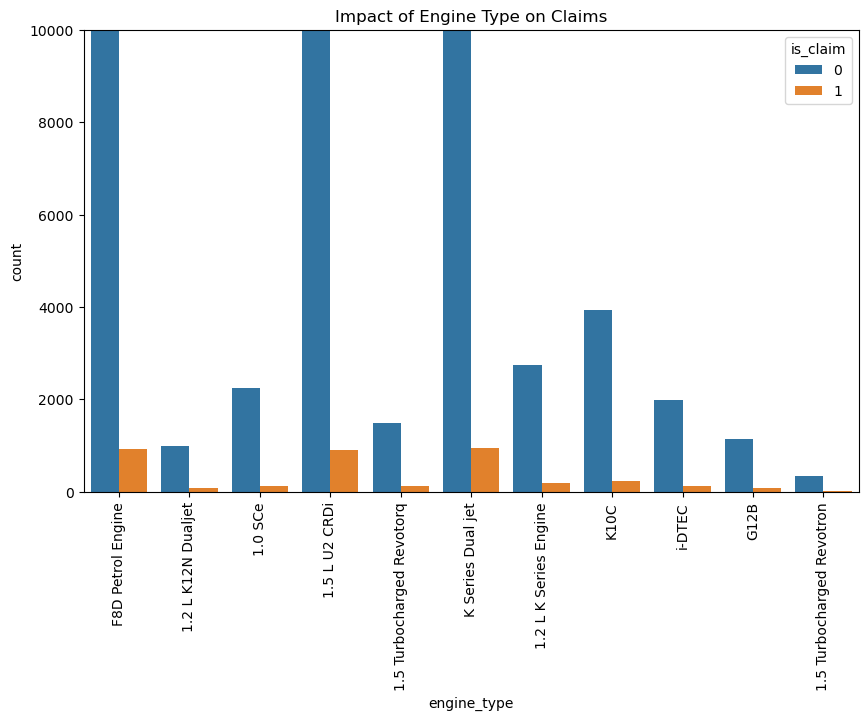

In [92]:
plt.figure(figsize=(10, 6))
sns.countplot(x='engine_type', hue='is_claim', data=df)

plt.title('Impact of Engine Type on Claims')
plt.xticks(rotation=90);
plt.ylim(0, 10_000);

Text(0.5, 1.0, 'Impact of Airbags on Claims')

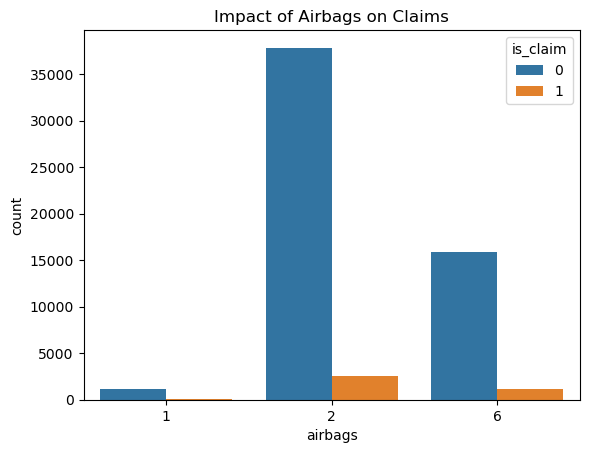

In [93]:
sns.countplot(x='airbags', hue='is_claim', data=df);
plt.title('Impact of Airbags on Claims')

In [44]:
# No obvious influence of number of airbags on claims

<Axes: xlabel='is_brake_assist', ylabel='count'>

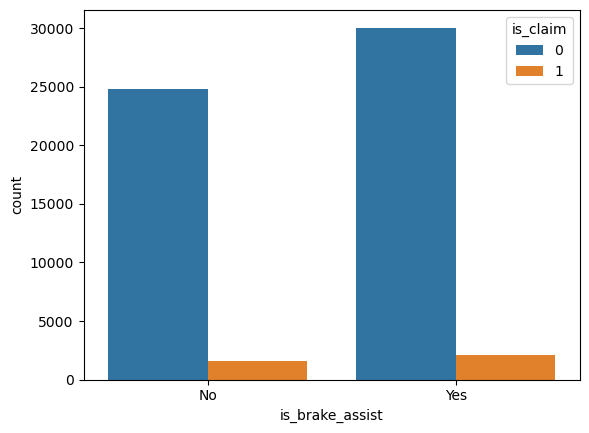

In [175]:
sns.countplot(x='is_brake_assist', hue='is_claim', data=df)

<Axes: xlabel='is_speed_alert', ylabel='count'>

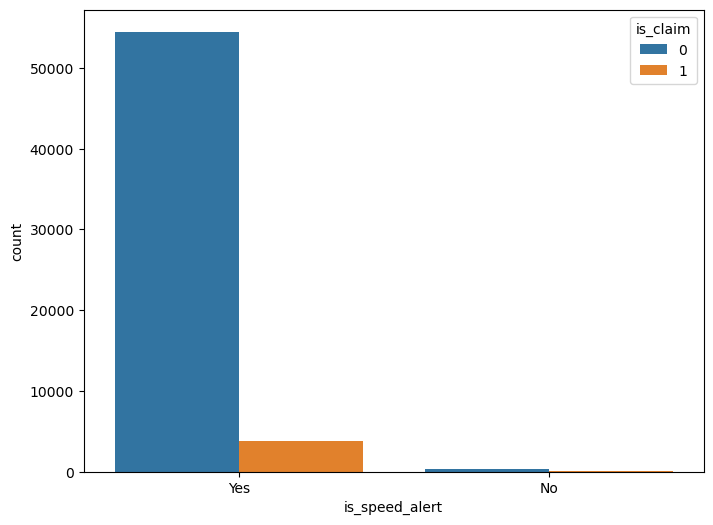

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_speed_alert', hue='is_claim', data=df)

In [47]:
# Cars having speed alert systems tend to have more claims

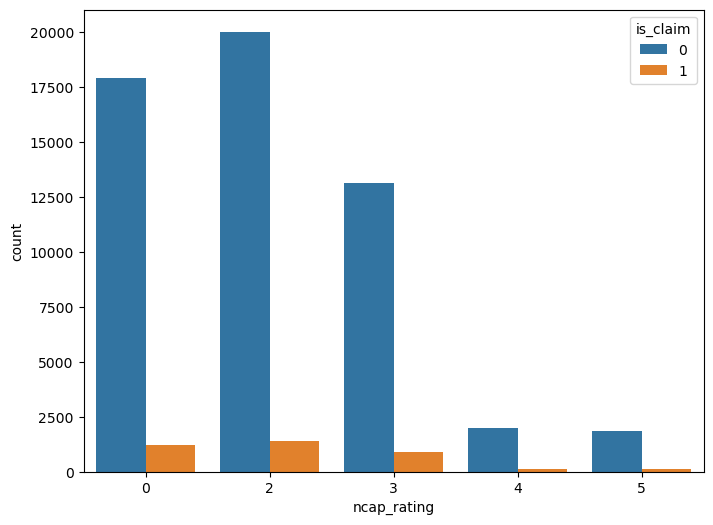

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ncap_rating', hue='is_claim', data=df);

In [49]:
# Higher rated cars tend to have less claims

<Axes: >

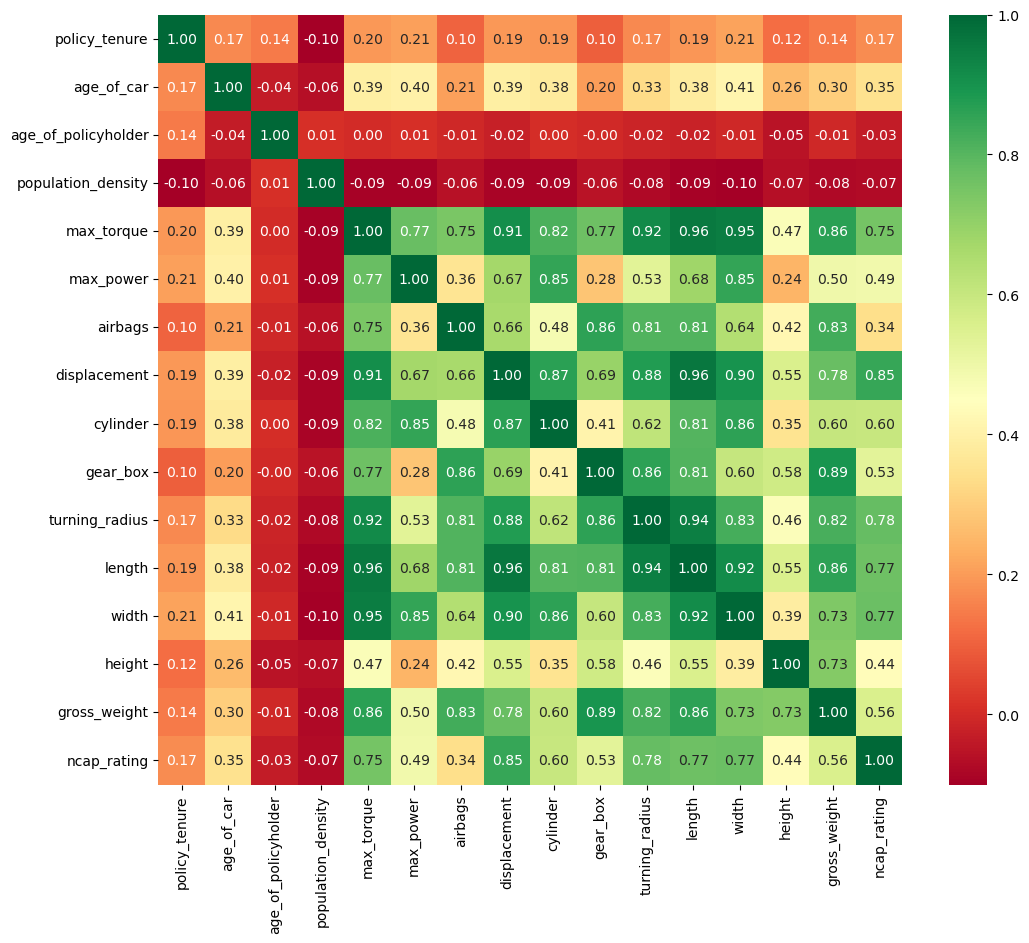

In [50]:
plt.figure(figsize=(12, 10))
cols = df.select_dtypes(['int', 'float']).drop(columns=['make', 'is_claim'])
sns.heatmap(cols.corr(), fmt='.2f', annot=True, cmap='RdYlGn')

In [51]:
# Variables that correlate with is_claim

numeric_cols = df.select_dtypes(['int', 'float']).columns
df[numeric_cols].corrwith(df['is_claim']).reset_index(name='corr')

,index,corr
0,policy_tenure,0.078747
1,age_of_car,-0.028172
2,age_of_policyholder,0.022435
3,population_density,-0.017808
4,make,-0.000456
5,max_torque,0.007934
6,max_power,0.010539
7,airbags,0.002789
8,displacement,0.007678
9,cylinder,0.013434


# Feature Engineering & Model building

In [52]:
X = df.drop('is_claim', axis=1)
y = df['is_claim']

X.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,210000.0,...,No,No,No,No,Yes,No,No,No,Yes,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,210000.0,...,No,No,No,No,Yes,No,No,No,Yes,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,210000.0,...,No,No,No,No,Yes,No,No,No,Yes,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,497200.0,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,386750.0,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2


In [53]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
categorical_features = X.select_dtypes('object').columns

for col in categorical_features:
  X[col] = enc.fit_transform(X[col]) # dataframe

y = enc.fit_transform(y) # numpy array

X

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,210000.0,...,0,0,0,0,1,0,0,0,1,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,210000.0,...,0,0,0,0,1,0,0,0,1,0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,210000.0,...,0,0,0,0,1,0,0,0,1,0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,497200.0,...,1,1,1,1,1,1,1,1,1,2
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,386750.0,...,0,0,1,1,1,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,20,8794,2,0,4,2,386750.0,...,0,0,1,1,1,0,1,1,1,2
58588,1.199642,0.02,0.519231,5,7788,1,0,0,0,210000.0,...,0,0,0,0,1,0,0,0,1,0
58589,1.162273,0.05,0.451923,17,34738,1,0,0,0,210000.0,...,0,0,0,0,1,0,0,0,1,0
58590,1.236307,0.14,0.557692,20,8794,1,2,7,2,497200.0,...,0,1,1,1,1,1,1,1,1,2


In [54]:
# Scaling:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.23028345, -0.34244685,  1.42255728, ..., -1.62062204,
         0.07895573, -1.2665479 ],
       [ 0.14818765, -0.87135928, -0.7683621 , ..., -1.62062204,
         0.07895573, -1.2665479 ],
       [ 0.55502223, -0.87135928, -0.69011498, ..., -1.62062204,
         0.07895573, -1.2665479 ],
       ...,
       [ 1.33048996, -0.34244685, -0.14238513, ..., -1.62062204,
         0.07895573, -1.2665479 ],
       [ 1.50925096,  1.24429045,  0.7183332 , ...,  0.61704702,
         0.07895573,  0.17275183],
       [-1.17545276, -0.87135928, -0.22063226, ...,  0.61704702,
         0.07895573,  0.8924017 ]])

Text(0.5, 1.0, 'Imbalance of Target Variable')

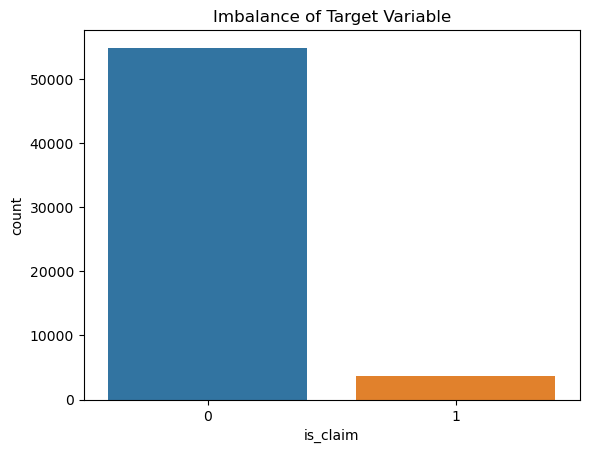

In [94]:
sns.countplot(x='is_claim', data=df)
plt.title('Imbalance of Target Variable')

In [56]:
# SMOTE - Synthetic Minority Over-sampling Technique
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_scaled, y = smote.fit_resample(X_scaled, y)

In [57]:
X_scaled

array([[-0.23028345, -0.34244685,  1.42255728, ..., -1.62062204,
         0.07895573, -1.2665479 ],
       [ 0.14818765, -0.87135928, -0.7683621 , ..., -1.62062204,
         0.07895573, -1.2665479 ],
       [ 0.55502223, -0.87135928, -0.69011498, ..., -1.62062204,
         0.07895573, -1.2665479 ],
       ...,
       [ 1.1009076 ,  1.10057051, -0.0785995 , ...,  0.61704702,
         0.07895573,  0.8924017 ],
       [ 0.52273595, -0.86175498, -1.22597102, ..., -1.62062204,
         0.07895573, -1.2665479 ],
       [ 1.36127707, -0.77498204, -0.29887938, ...,  0.61704702,
         0.07895573,  0.17275183]])

In [58]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [59]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([54844, 54844], dtype=int64))

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, f1_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train

array([[ 0.60235781, -0.87135928, -0.03408988, ..., -1.62062204,
         0.07895573, -1.2665479 ],
       [ 1.33546548,  1.42059459,  0.16546891, ...,  0.61704702,
         0.07895573,  0.8924017 ],
       [-0.01410752,  0.14970382, -0.69344569, ...,  0.61704702,
         0.07895573,  0.17275183],
       ...,
       [ 0.9528448 , -0.07062847,  1.21713708, ...,  0.61704702,
         0.07895573, -1.2665479 ],
       [ 1.39857176,  1.0679863 , -1.15959771, ...,  0.61704702,
         0.07895573,  0.17275183],
       [-1.41984861, -1.22396757,  1.89204001, ..., -1.62062204,
         0.07895573, -1.2665479 ]])

In [55]:
#         Predicted
# Actual  1   0
#     1   TP   FP
#     0   FN   TN

#     Acc = (TP+TN) / (TP+TN + FP + FN)
#     Recall = TP / (TP + FN)
#     Precision = TP / (TP + FP)
#     F1 = 2 * (Precision * Recall) / (Precision + Recall)

# Insurance claim prediction:
# pred 0
# Actual 1 - False Negative - Lose money

# pred 1
# Actual 0 - False Positive - No problem

In [62]:
def evaluate_model(model_name, model, y_pred):
  TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
  eval = {
      'model': model_name,
      'accuracy': accuracy_score(y_test, y_pred),
      'recall': recall_score(y_test, y_pred),
      'precision': precision_score(y_test, y_pred),
      'f1_score': f1_score(y_test, y_pred),
      'cost': 10*FP + 100_000*FN, # Penalizing False Negatives
      'confusion_matrix': confusion_matrix(y_test, y_pred),
      'roc': roc_curve(y_test, y_pred)
  }
  return eval

In [133]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}
model_evals = []

In [134]:
for model_name, model in models.items():
  model.fit(X_train, y_train) # Train each model
  y_pred = model.predict(X_test) # Get predictions
  eval = evaluate_model(model_name, model, y_pred) # Evaluate each model
  model_evals.append(eval)

In [135]:
model_evals

[{'model': 'Logistic Regression',
  'accuracy': 0.5794055975932173,
  'recall': 0.5970864834962198,
  'precision': 0.5714285714285714,
  'f1_score': 0.5839758329951757,
  'cost': 437048570,
  'confusion_matrix': array([[6235, 4857],
         [4370, 6476]], dtype=int64),
  'roc': (array([0.        , 0.43788316, 1.        ]),
   array([0.        , 0.59708648, 1.        ]),
   array([inf,  1.,  0.]))},
 {'model': 'Random Forest',
  'accuracy': 0.9279332664782569,
  'recall': 0.9253180896182924,
  'precision': 0.92865735171648,
  'f1_score': 0.9269847134346278,
  'cost': 81007710,
  'confusion_matrix': array([[10321,   771],
         [  810, 10036]], dtype=int64),
  'roc': (array([0.        , 0.06950956, 1.        ]),
   array([0.        , 0.92531809, 1.        ]),
   array([inf,  1.,  0.]))},
 {'model': 'XGBoost',
  'accuracy': 0.9244689579724679,
  'recall': 0.8702747556702932,
  'precision': 0.9741975436061513,
  'f1_score': 0.919308497686876,
  'cost': 140702500,
  'confusion_matrix': 

In [136]:
for eval in model_evals:
  print(f"Model: {eval['model']}")
  print(f"Accuracy: {eval['accuracy']}")
  print(f"Recall: {eval['recall']}")
  print(f"Precision: {eval['precision']}")
  print(f"F1 Score: {eval['f1_score']}")
  print(f"Cost: {eval['cost']}")
  print('\n======================\n')

Model: Logistic Regression
Accuracy: 0.5794055975932173
Recall: 0.5970864834962198
Precision: 0.5714285714285714
F1 Score: 0.5839758329951757
Cost: 437048570


Model: Random Forest
Accuracy: 0.9279332664782569
Recall: 0.9253180896182924
Precision: 0.92865735171648
F1 Score: 0.9269847134346278
Cost: 81007710


Model: XGBoost
Accuracy: 0.9244689579724679
Recall: 0.8702747556702932
Precision: 0.9741975436061513
F1 Score: 0.919308497686876
Cost: 140702500




In [137]:
eval_df = pd.DataFrame(model_evals)

In [138]:
for col in ['accuracy', 'recall', 'precision', 'f1_score']:
  eval_df[col] = eval_df[col] * 100

eval_df.head()

,model,accuracy,recall,precision,f1_score,cost,confusion_matrix,roc
0,Logistic Regression,57.940560,59.708648,57.142857,58.397583,437048570,"[[6235, 4857], [4370, 6476]]","([0.0, 0.4378831590335377, 1.0], [0.0, 0.59708..."
1,Random Forest,92.793327,92.531809,92.865735,92.698471,81007710,"[[10321, 771], [810, 10036]]","([0.0, 0.06950955643707177, 1.0], [0.0, 0.9253..."
2,XGBoost,92.446896,87.027476,97.419754,91.930850,140702500,"[[10842, 250], [1407, 9439]]","([0.0, 0.02253876667868734, 1.0], [0.0, 0.8702..."


In [139]:
def compare_model_metric(metric, percent=True):
  plt.figure()
  sns.barplot(x='model', y=metric, data=eval_df.sort_values(by=metric, ascending=False))
  plt.title(f"Model {metric} {'scores (%)' if percent else ''}")
  plt.show()

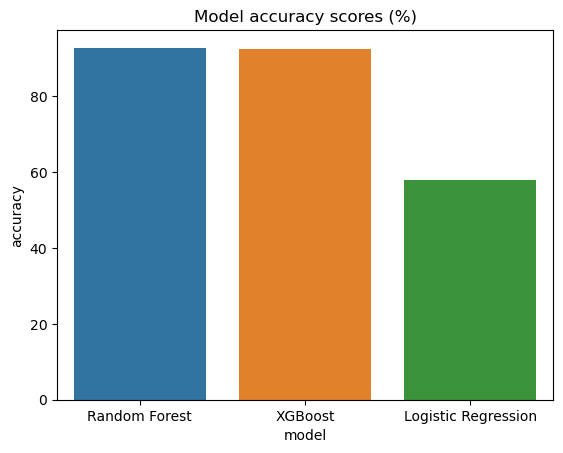

In [140]:
compare_model_metric('accuracy')

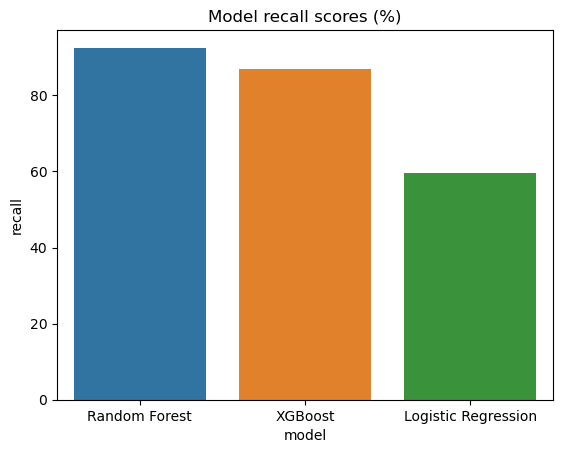

In [141]:
compare_model_metric('recall')

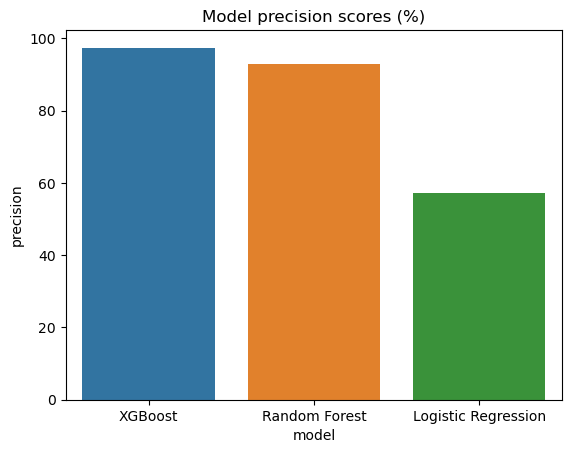

In [142]:
compare_model_metric('precision')

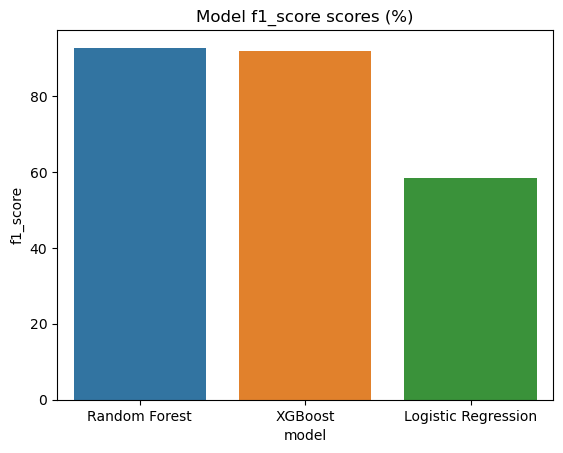

In [143]:
compare_model_metric('f1_score')

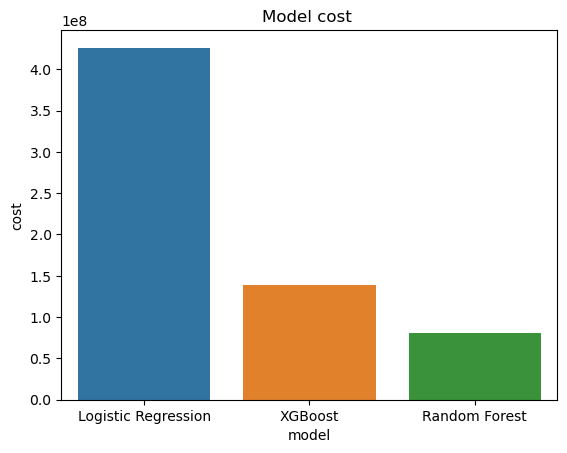

In [97]:
compare_model_metric('cost', False)

In [145]:
np.array(model_evals[0]['roc'])

array([[0.        , 0.43788316, 1.        ],
       [0.        , 0.59708648, 1.        ],
       [       inf, 1.        , 0.        ]])

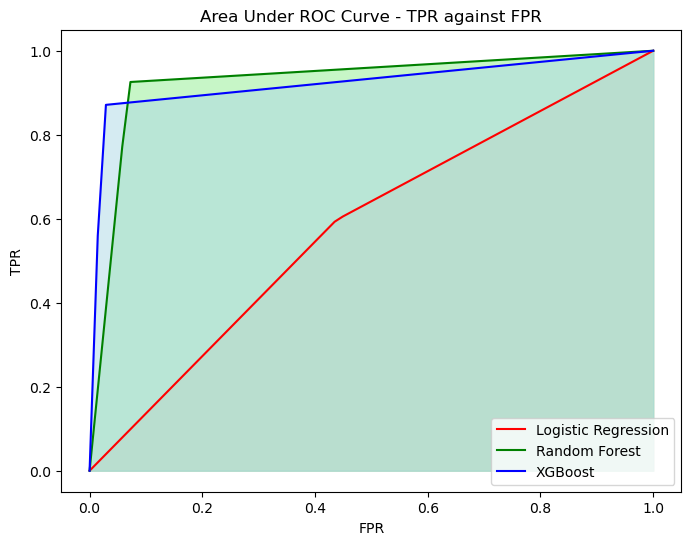

In [151]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

colors = [('red', 'pink'),
          ('green', 'lightgreen'),
          ('blue', 'lightblue')]

for i, eval in enumerate(model_evals):
    FPR, TPR, _ = eval['roc']
    FPR_fine = np.linspace(0, 1, 70)  # Increase number of points (1000 is just an example)
    TPR_fine = np.interp(FPR_fine, FPR, TPR) # Use interpolation to get the corresponding TPR values for the new FPR points

    clr, light_clr = colors[i]
    # plt.plot(FPR_fine, TPR_fine, label=eval['model'])
    sns.lineplot(x=FPR_fine, y=TPR_fine, color=clr, label=eval['model'])

    plt.fill_between(FPR_fine, TPR_fine, color=light_clr, alpha=0.5)
    plt.title('Area Under ROC Curve - TPR against FPR');
    plt.ylabel('TPR')
    plt.xlabel('FPR');

plt.legend()
plt.show();

In [147]:
# Let's go with Random Forest.
# Create a final Random Forest model

In [119]:
# You can aaply GridSearchCV or RandomSearchCV to fine-tune Random Forest

In [120]:
final_model = models['Random Forest']

In [121]:
final_model.feature_importances_

array([2.62237703e-01, 2.77738966e-01, 2.42382790e-01, 1.03255660e-01,
       9.87816644e-02, 2.46261346e-04, 5.79883963e-04, 1.29388262e-03,
       1.81501183e-04, 1.08968930e-03, 6.48181568e-04, 5.32605395e-04,
       1.49001024e-04, 1.40896366e-04, 2.14760321e-04, 4.20643585e-05,
       5.50187741e-05, 1.69205208e-04, 6.00781002e-05, 1.30753321e-03,
       3.44763436e-04, 1.08768773e-04, 5.33339980e-05, 1.76960126e-04,
       6.26396676e-04, 7.85167754e-04, 8.37712119e-04, 2.29811814e-03,
       1.10261178e-03, 1.07086935e-04, 7.43673274e-05, 9.79306615e-05,
       1.20854154e-04, 1.34504967e-04, 4.18562349e-04, 2.20124515e-04,
       4.51279977e-05, 2.10799069e-04, 1.41840161e-04, 2.77035945e-04,
       9.32137695e-05, 6.17372050e-04])

In [122]:
feature_imp_df = pd.DataFrame({'feature': X.columns, 'importance': final_model.feature_importances_ * 100})
feature_imp_df = feature_imp_df.sort_values(by='importance', ascending=False)

feature_imp_df.head()

,feature,importance
1,age_of_car,27.773897
0,policy_tenure,26.223770
2,age_of_policyholder,24.238279
3,area_cluster,10.325566
4,population_density,9.878166


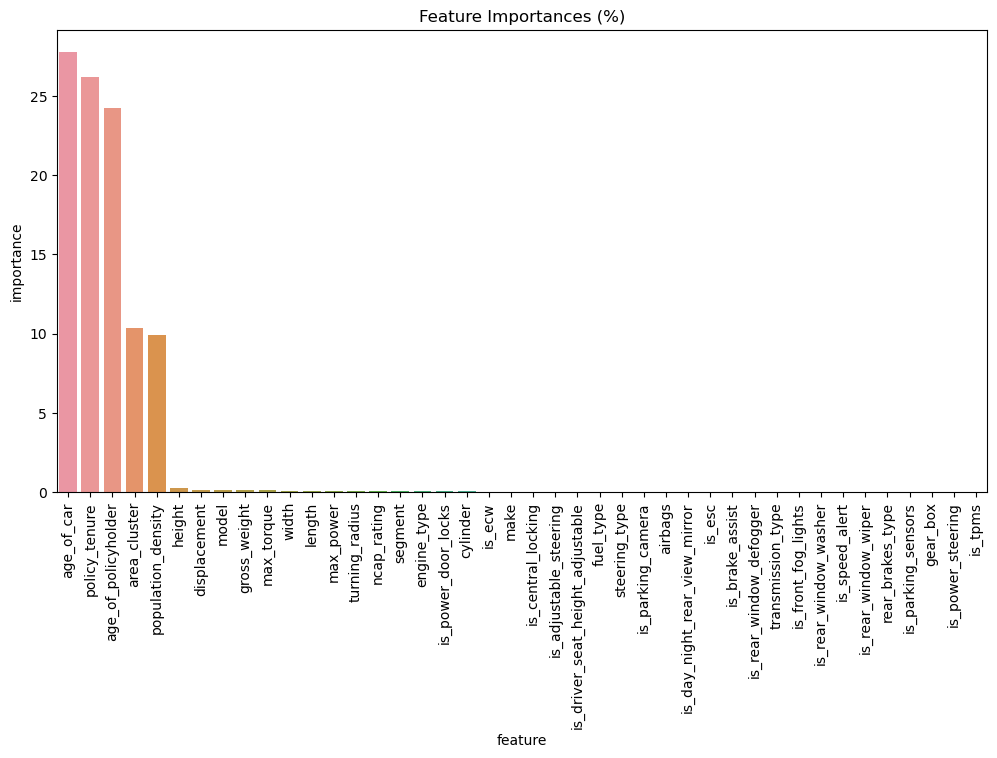

In [123]:
plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='importance', data=feature_imp_df)

plt.title('Feature Importances (%)')
plt.xticks(rotation=90);

In [124]:
feature_imp_df.to_csv('feature_importance.csv', index=False)

In [125]:
top_N = 5
top_5_features = feature_imp_df.head(top_N)['feature'].values
top_5_features

array(['age_of_car', 'policy_tenure', 'age_of_policyholder',
       'area_cluster', 'population_density'], dtype=object)

In [126]:
X_final = X[top_5_features]
y_final = df['is_claim']
X_final.head()

,age_of_car,policy_tenure,age_of_policyholder,area_cluster,population_density
0,0.05,0.515874,0.644231,0,4990
1,0.02,0.672619,0.375000,11,27003
2,0.02,0.841110,0.384615,15,4076
3,0.11,0.900277,0.432692,16,21622
4,0.11,0.596403,0.634615,17,34738


In [127]:
X_final = scaler.fit_transform(X_final)
X_final, y_final = smote.fit_resample(X_final, y_final)

In [128]:
final_model = RandomForestClassifier()
final_model.fit(X_final, y_final)

RandomForestClassifier()

In [129]:
pd.DataFrame({'features': top_5_features,
              'importance': final_model.feature_importances_ * 100}).sort_values(by='importance', ascending=False)

,features,importance
0,age_of_car,29.933443
2,age_of_policyholder,27.844674
1,policy_tenure,26.561239
3,area_cluster,8.778051
4,population_density,6.882593


In [197]:
final_model.classes_

array([0, 1], dtype=int64)

In [209]:
def predict_claim(user_input):
  # Create a dataframe out of user_input
  user_input = pd.DataFrame(user_input)

  # # Scale the user_inputues using scaler.transform()
  user_input = scaler.transform(user_input)

  # Predict and decode prediction
  # preds = final_model.predict(user_input)
  # print(['Not claim' if pred == 0 else 'Claim' for pred in preds])
  probabs = final_model.predict_proba(user_input)
  for p in probabs:
    print(f'Claim probability: {p[1]}') 

In [210]:
val = {
    'age_of_car':	[0.01],
    'policy_tenure':	[3.5],
    'age_of_policyholder':	[0.5],
    'area_cluster':	[10],
    'population_density': [3000]
}
predict_claim(val)

Claim probability: 0.18


In [132]:
# age_of_car	policy_tenure	age_of_policyholder	area_cluster	population_density
#       0.05	0.515874	    0.644231	          0	              4990
#       0.02	0.672619	    0.375000	          11	            27003
#       0.02	0.841110	    0.384615	          15	            4076
#       0.11	0.900277	    0.432692	          16	            21622
#       0.11	0.596403	    0.634615	          17	            34738
